In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1,1)

In [5]:
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

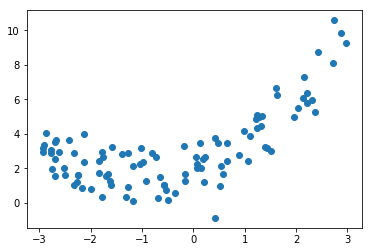

In [6]:
plt.scatter(x, y)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y_pre = lin_reg.predict(X)

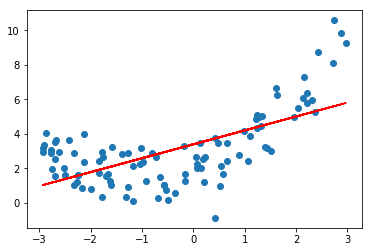

In [9]:

plt.scatter(x, y)
plt.plot(x, y_pre,color='r')
plt.show()

## 解决方案，添加一个特征

In [10]:
(X**2).shape

(100, 1)

In [11]:
X2 = np.hstack([X,X**2])
X2.shape

(100, 2)

In [13]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_pre2 = lin_reg2.predict(X2)

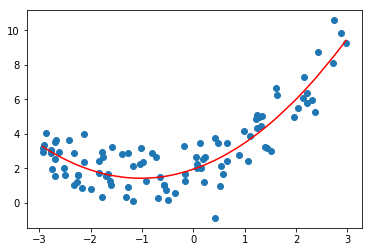

In [16]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_pre2[np.argsort(x)],color='r')
plt.show()

In [18]:
lin_reg2.coef_,lin_reg2.intercept_

(array([1.02308745, 0.50104546]), 1.9461828574362254)

## sclijit-learn中的多项式回归和Pipeline

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
poly = PolynomialFeatures(degree=2) #添加到特征的第几次幂
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(100, 3)

In [68]:
X2[:5, :]

array([[ 1.        , -1.81547632,  3.29595425],
       [ 1.        ,  1.04094893,  1.08357467],
       [ 1.        , -0.68976317,  0.47577323],
       [ 1.        ,  2.5073593 ,  6.28685064],
       [ 1.        , -2.68286052,  7.19774058]])

In [69]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X2, y)
y_pre = lin_reg.predict(X2)
lin_reg.coef_

array([0.        , 1.05515475, 0.48704956])

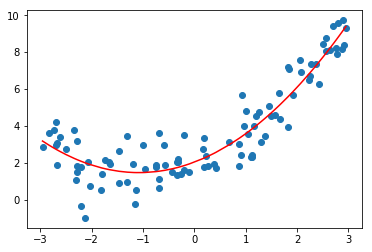

In [70]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_pre[np.argsort(x)],color='r')
plt.show()

## 关于PolynomiaFeatures

In [37]:
X = np.arange(1, 11).reshape(-1,2)

In [41]:
X.shape,X

((5, 2), array([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10]]))

In [40]:
poly=PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [42]:
X2.shape

(5, 6)

In [43]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

## Pipeline
集合了特征、归一化和数据回归

In [44]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),#特征变化
    ("std_scaler",StandardScaler()), #归一化
    ("lin_reg",LinearRegression()) #线性回归
])

In [72]:
pipe.fit(X, y)
y_pre = pipe.predict(X)

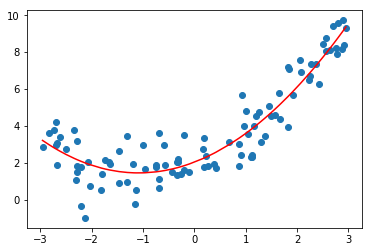

In [54]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_pre[np.argsort(x)],color='r')
plt.show()

## 过拟合和欠拟合

In [73]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

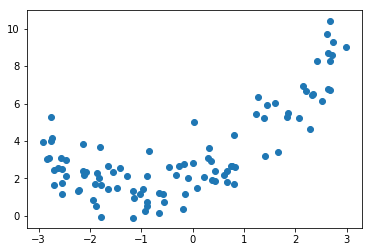

In [74]:
plt.scatter(x, y)
plt.show()

## 简单线性回归

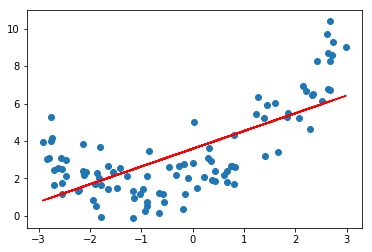

In [76]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X,y)
y_pre = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(x, y_pre,color='r')
plt.show()

In [77]:
# 使用R方进行评分
lin_reg.score(X,y)

0.4883609864733773

In [78]:
# 使用均方误差进行评分
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pre)

2.973010194572995

## 使用多项式回归

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),#特征变化
    ("std_scaler",StandardScaler()), #归一化
    ("lin_reg",LinearRegression()) #线性回归
])

In [87]:
poly_2reg = PolynomialRegression(2)
poly_2reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [88]:
y2_pre = poly_2reg.predict(X)
mean_squared_error(y,y2_pre)

1.0696653958850788

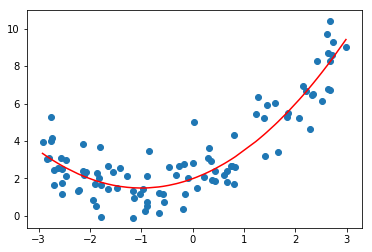

In [89]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_pre[np.argsort(x)],color='r')
plt.show()

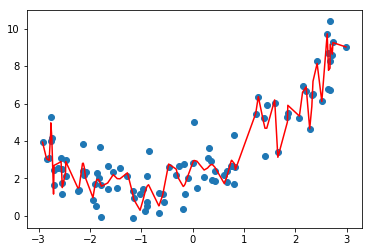

0.5562235436113534

In [95]:
poly_100reg = PolynomialRegression(100)
poly_100reg.fit(X,y)
y100_pre = poly_100reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y100_pre[np.argsort(x)],color='r')
plt.show()
mean_squared_error(y,y100_pre)

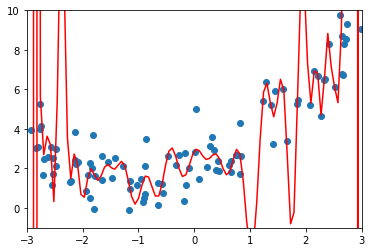

In [101]:
X_plot = np.linspace(-3, 3, 100).reshape(100,1)
y_plpot = poly_100reg.predict(X_plot)
plt.scatter(x, y)
plt.plot(X_plot[:,0],y_plpot, color='r')
plt.axis([-3,3,-1,10])
plt.show()
#可以看出，过拟合了

### train test split 的意义

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

In [126]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pre = lin_reg.predict(X_test)
mean_squared_error(y_test, y_pre)

3.1318052271804886

In [127]:
poly_100reg = PolynomialRegression(degree=2)
poly_100reg.fit(X_train,y_train)
y100_pre = poly_100reg.predict(X_test)
mean_squared_error(y_test,y100_pre)

0.6888480684063345

In [129]:
poly_100reg = PolynomialRegression(degree=100)
poly_100reg.fit(X_train,y_train)
y100_pre = poly_100reg.predict(X_test)
mean_squared_error(y_test,y100_pre)

9.568376524997253e+23

# 学习曲线

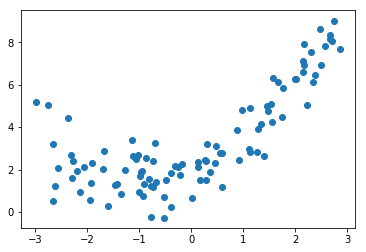

In [142]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

In [143]:
#分割数据
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [144]:
X_train.shape

(75, 1)

In [145]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_absolute_error

train_score = []
test_score = []
for i in range(1,76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i],y_train[:i])
    
    y_train_pre = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_pre))
    
    y_test_pre = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_pre))
    

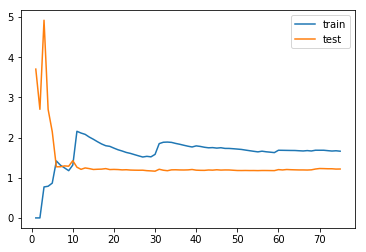

In [146]:
plt.plot([i for i in range(1,76)],np.sqrt(train_score), label="train")
plt.plot([i for i in range(1,76)],np.sqrt(test_score), label="test")
plt.legend()

In [148]:
#提炼成函数
def plot_learing_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1,len(X_train)+1):
        algo.fit(X_train[:i],y_train[:i])

        y_train_pre = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_pre))

        y_test_pre = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_pre))
    plt.plot([i for i in range(1,76)],np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1,76)],np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1,0,4])

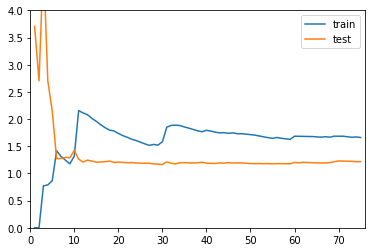

In [149]:
plot_learing_curve(LinearRegression(), X_train, X_test, y_train, y_test)

## 对于多项式回归

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),#特征变化
    ("std_scaler",StandardScaler()), #归一化
    ("lin_reg",LinearRegression()) #线性回归
])

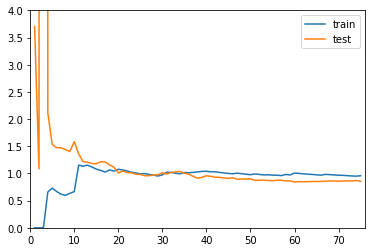

In [151]:
poly2_reg = PolynomialRegression(degree=2)
plot_learing_curve(poly2_reg,X_train, X_test, y_train, y_test)

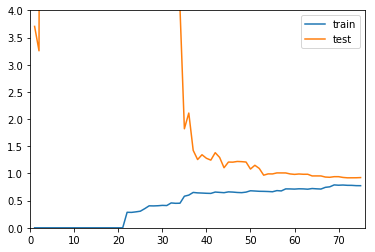

In [152]:
poly2_reg = PolynomialRegression(degree=20)
plot_learing_curve(poly2_reg,X_train, X_test, y_train, y_test)

# 交叉验证

In [154]:
import numpy as np
from sklearn import datasets

In [155]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

## 测试train_test_split

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=666)

In [160]:
from sklearn.neighbors import KNeighborsClassifier

best_score, best_p, best_k = 0,0,0
for k in range(2,11):
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(weights="distance",
                                      n_neighbors=k,p=p)
        knn_clf.fit(X_train,y_train)
        score = knn_clf.score(X_test,y_test)
        if score > best_score:
            best_score, best_p, best_k = score, p , k
print("best k =", best_k)
print("best p =", best_p)
print("best score =", best_score)
            
        

best k = 3
best p = 4
best score = 0.9860917941585535


## 使用交叉验证

In [178]:
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train,cv=3) #默认把训练数据分成三份进行交叉验证

array([0.98895028, 0.97777778, 0.96629213])

In [163]:
from sklearn.neighbors import KNeighborsClassifier

best_score, best_p, best_k = 0,0,0
for k in range(2,11):
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(weights="distance",
                                      n_neighbors=k,p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_score, best_p, best_k = score, p , k
print("best k =", best_k)
print("best p =", best_p)
print("best score =", best_score)
            
        

best k = 2
best p = 2
best score = 0.9823599874006478


In [168]:
 best_knn_clf = KNeighborsClassifier(weights="distance",
                                      n_neighbors=2,p=2)

In [169]:
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.980528511821975

## 回顾网格搜索

In [172]:
from sklearn.model_selection import GridSearchCV

param_grid = [
#     {
#         "weights":["uniform"],
#         "n_neighbors":[i for i in range(1,11)]
#     },
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(2,11)],
        "p":[i for i in range(1,6)]
    }
]
knn_reg = KNeighborsClassifier()
grid_search = GridSearchCV(knn_reg,param_grid,n_jobs=-1,verbose=1,cv=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   16.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [173]:
grid_search.best_score_

0.9823747680890538

In [174]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [176]:
best_knn_clf = grid_search.best_estimator_

In [177]:
best_knn_clf.score(X_test,y_test)

0.980528511821975

# 过拟合

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),#特征变化
    ("std_scaler",StandardScaler()), #归一化
    ("lin_reg",lin_reg) #线性回归
])

In [12]:
import numpy as np
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [13]:
from sklearn.metrics import mean_squared_error

poly_100reg = PolynomialRegression(100)
poly_100reg.fit(X,y)

y100_pre = poly_100reg.predict(X)
# plt.scatter(x, y)
# plt.plot(np.sort(x), y100_pre[np.argsort(x)],color='r')
# plt.show()
mean_squared_error(y,y100_pre)

0.4526578973555194

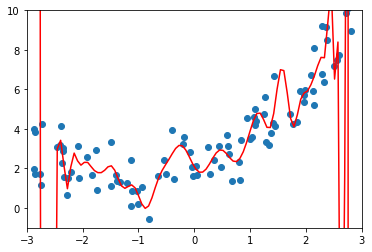

In [14]:
import matplotlib.pyplot as plt
X_plot = np.linspace(-3, 3, 100).reshape(100,1)
y_plpot = poly_100reg.predict(X_plot)
plt.scatter(x, y)
plt.plot(X_plot[:,0],y_plpot, color='r')
plt.axis([-3,3,-1,10])
plt.show()

In [15]:
lin_reg.coef_

array([ 5.95252051e+11, -8.41597146e+00,  4.00088421e+01,  4.93604043e+02,
       -2.73937296e+03, -3.28049540e+03,  1.02028037e+05, -5.08865319e+05,
       -2.59727819e+06,  2.11655385e+07,  4.36221431e+07, -4.22392176e+08,
       -4.89562806e+08,  5.21864025e+09,  3.82590056e+09, -4.35028439e+10,
       -2.16590376e+10,  2.54338990e+11,  9.12871276e+10, -1.05744909e+12,
       -2.89167735e+11,  3.10146952e+12,  6.77135125e+11, -6.16313553e+12,
       -1.10146090e+12,  7.34798183e+12,  1.02403153e+12, -2.84569181e+12,
       -2.10555617e+10, -4.46150288e+12, -1.07543888e+12,  4.39491979e+12,
        6.06767379e+11,  3.12718792e+12,  9.49823005e+11, -3.13194857e+12,
       -9.00373362e+11, -4.21216863e+12, -5.36433237e+11,  1.13876973e+12,
        4.61655277e+11,  4.79600937e+12,  2.55626018e+11,  1.68495129e+12,
        4.17388277e+10, -2.41543628e+12,  6.83936996e+11, -4.11395100e+12,
       -1.26408352e+12, -1.70159574e+12, -1.45953859e+11,  2.37808984e+12,
       -4.08391074e+10,  

## 模型正则化

# 岭回归

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:

np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

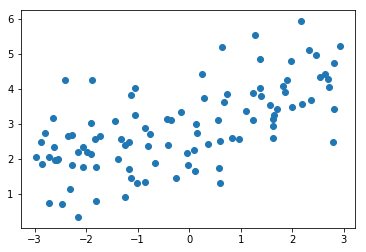

In [18]:
plt.scatter(x, y)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),#特征变化
    ("std_scaler",StandardScaler()), #归一化
    ("lin_reg",LinearRegression()) #线性回归
])

In [30]:
from sklearn.model_selection import train_test_split
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=666)

In [32]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train,y_train)

y_pre = poly_reg.predict(X_test)
mean_squared_error(y_test,y_pre)

180.05936423838926

In [35]:
import matplotlib.pyplot as plt
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100,1)
    y_plpot = model.predict(X_plot)
    plt.scatter(x, y)
    plt.plot(X_plot[:,0],y_plpot, color='r')
    plt.axis([-3,3,-1,10])
    plt.show()

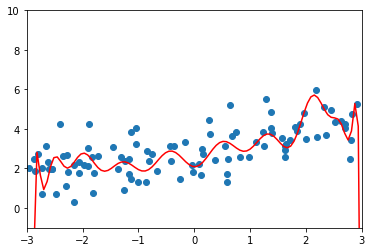

In [37]:
plot_model(poly_reg)

## 使用岭回归

In [39]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
#封装岭回归
def RidgeRegression(degree,alpha):
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),#特征变化
    ("std_scaler",StandardScaler()), #归一化
    ("lin_reg",Ridge(alpha=alpha)) #线性回归
])

In [48]:
ridgel_reg = RidgeRegression(20,0.0001)
ridgel_reg.fit(X_train,y_train)

y_pre = ridgel_reg.predict(X_test)
mean_squared_error(y_test, y_pre)

1.0593042331484845

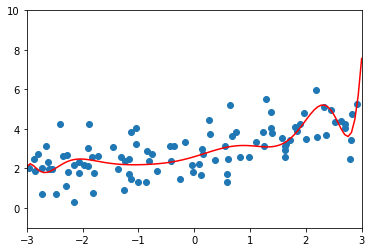

In [41]:
plot_model(ridgel_reg)

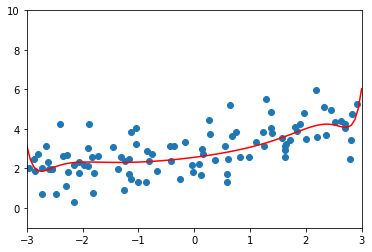

0.926528069126273

In [43]:
ridgel_reg = RidgeRegression(20,1)
ridgel_reg.fit(X_train,y_train)

y_pre = ridgel_reg.predict(X_test)
plot_model(ridgel_reg)
mean_squared_error(y_test, y_pre)

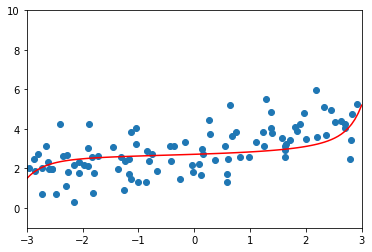

1.2286343186908597

In [44]:
ridgel_reg = RidgeRegression(20,100)
ridgel_reg.fit(X_train,y_train)

y_pre = ridgel_reg.predict(X_test)
plot_model(ridgel_reg)
mean_squared_error(y_test, y_pre)

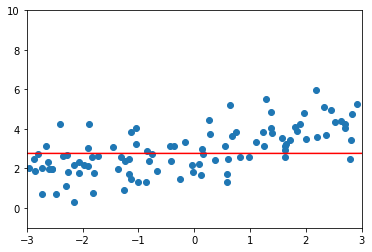

1.6607829802827472

In [45]:
ridgel_reg = RidgeRegression(20,1000000)
ridgel_reg.fit(X_train,y_train)

y_pre = ridgel_reg.predict(X_test)
plot_model(ridgel_reg)
mean_squared_error(y_test, y_pre)

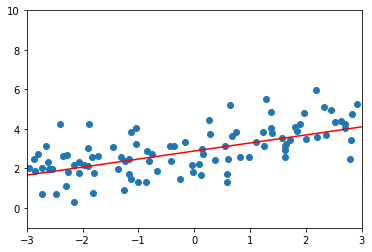

0.9211988070139757

In [51]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)
y_pre = clf.predict(X_test)
plot_model(clf)
mean_squared_error(y_test, y_pre)

# LASSO回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

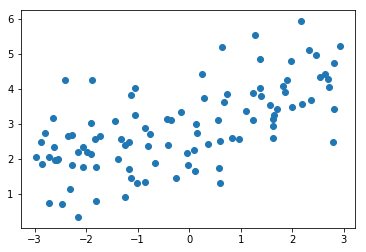

In [2]:
plt.scatter(X,y)

In [3]:
from sklearn.model_selection import train_test_split
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=666)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),#特征变化
    ("std_scaler",StandardScaler()), #归一化
    ("lin_reg",LinearRegression()) #线性回归
])

In [5]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train,y_train)

y_pre = poly_reg.predict(X_test)
mean_squared_error(y_test,y_pre)

180.05936423838926

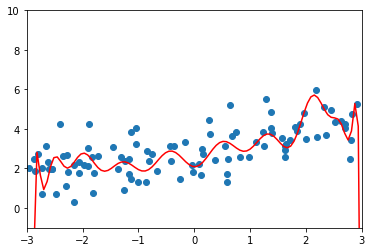

In [6]:
import matplotlib.pyplot as plt
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100,1)
    y_plpot = model.predict(X_plot)
    plt.scatter(x, y)
    plt.plot(X_plot[:,0],y_plpot, color='r')
    plt.axis([-3,3,-1,10])
    plt.show()
plot_model(poly_reg)

## LASSO

In [10]:
from sklearn.linear_model import Lasso

def LassoRegression(degree,alpha):
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),#特征变化
    ("std_scaler",StandardScaler()), #归一化
    ("lin_reg",Lasso(alpha=alpha)) #线性回归
])

In [12]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train,y_train)
y1_pre = lasso1_reg.predict(X_test)
mean_squared_error(y_test,y1_pre)

0.9125933291097784

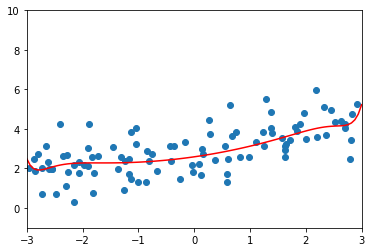

In [13]:
plot_model(lasso1_reg)

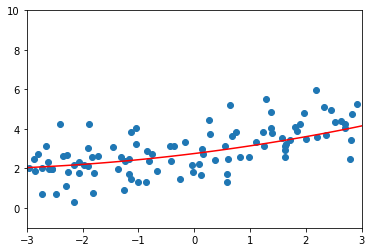

0.9361064642922144

In [15]:
lasso1_reg = LassoRegression(20, 0.1)
lasso1_reg.fit(X_train,y_train)
y1_pre = lasso1_reg.predict(X_test)
plot_model(lasso1_reg)
mean_squared_error(y_test,y1_pre)

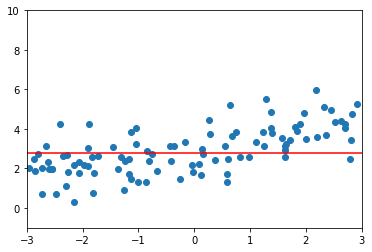

1.6611078580155556

In [16]:
lasso1_reg = LassoRegression(20, 1)
lasso1_reg.fit(X_train,y_train)
y1_pre = lasso1_reg.predict(X_test)
plot_model(lasso1_reg)
mean_squared_error(y_test,y1_pre)